In [3]:
import numpy as np 
import scipy.stats as stats 
import matplotlib.pyplot as plt

In [4]:
def generate(N):
    
    #Генерируем точки в квадрате равномерно
    
    x = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=N)
    y = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=N)
    
    #Упаковываем парами 
    points = list(map(list, zip(x, y)))
    
    #Если встречается точка внутри маленького квадрата, перегенирируем пока не станет вне
    for elem in points:
        while (np.abs(elem[0]) < np.sqrt(2)/2) & (np.abs(elem[1]) < np.sqrt(2)/2):
            elem[0] = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=1)
            elem[1] = stats.uniform.rvs(loc=-(3*(2)**(0.5))/4, scale=3*(2)**(0.5)/2, size=1)
    points = np.array(points)
    
    x1 = points[:,0]
    y1 = points[:,1]
    
    #Умножаем на матрицу поворота на 45 градусов
                          
    x2 = (((2)**(0.5))/2)*x1 + (((2)**(0.5))/2)*y1
    y2 = -(((2)**(0.5))/2)*x1 + (((2)**(0.5))/2)*y1
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    #Для вспомогательных прямых 
                          
    dom1b = np.linspace(-1.5, 0, 2)
    dom1s = np.linspace(-1, 0, 2)
    dom2b = np.linspace(0, 1.5, 2)
    dom2s = np.linspace(0, 1, 2)
                          
    #Нарисуем границы двух ромбиков красным:
    
    ax.plot(dom1b, dom1b + 1.5, 'r')
    ax.plot(dom1s, dom1s + 1, 'r')
    ax.plot(dom1b, -dom1b - 1.5, 'r')
    ax.plot(dom1s, -dom1s - 1, 'r')
    ax.plot(dom2b, 1.5 - dom2b, 'r')
    ax.plot(dom2s, 1 - dom2s, 'r')
    ax.plot(dom2s, dom2s - 1, 'r')
    ax.plot(dom2b, dom2b - 1.5, 'r')
    
                          
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    
    #Добавим все точки выборки 
                          
    ax.scatter(x2, y2, s=1)
    
    #по желанию оси в центр 
                          
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_yticks([-2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2])
    
    plt.show()

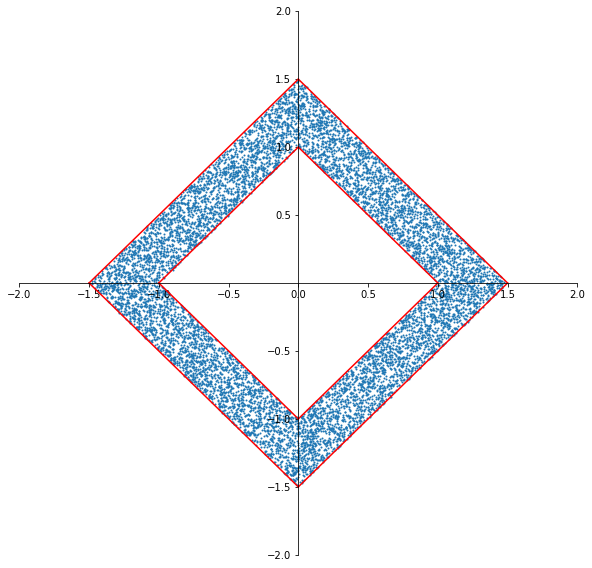

In [5]:
generate(10000)